In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import KFold, cross_val_score
import os
from graphviz import Source

In [78]:
data = pd.read_csv('../datasets/iris/iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [79]:
data.describe(include='all')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


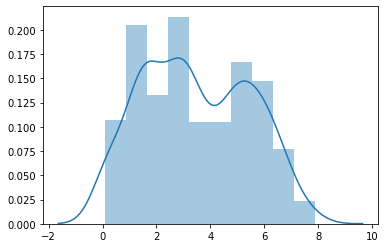

In [80]:
sns.distplot(data.iloc[:,0:4])

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

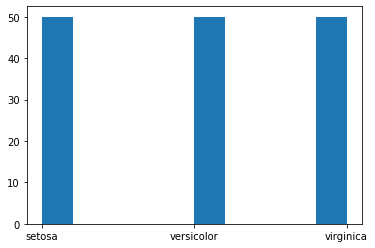

In [81]:
plt.hist(data.Species)

### empiezo a preparar la data

In [82]:
columns = data.columns.values.tolist()
predictors = columns[:4]
target = columns[4]

In [83]:
print(predictors)
print(target)

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
Species


**creo manualmente el conjunto de test_train**

In [84]:
#como la condición me devuelve true/false, lo multiplico x 1 así obtengo el valor numérico
data['is_train'] = (np.random.uniform(0, 1, len(data))<0.75)*1

Text(0.5, 1.0, 'conjunto de test/train')

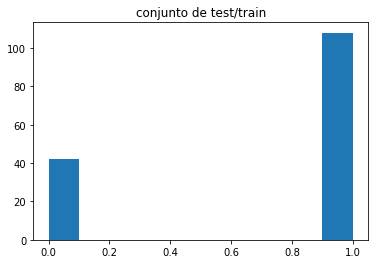

In [85]:
plt.hist(data.is_train)
plt.title("conjunto de test/train")

In [86]:
#divido los conjuntos
train = data[data['is_train']==1]
test = data[data['is_train']==0]

**creo y fiteo el árbol**

In [87]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

**realizo la predicción**

In [88]:
#utilizo el conjunto de test para realizar la prediccion, pasando el nombre de las variables X:
preds = tree.predict(test[predictors])

In [89]:
#tabla cruzada:
#comparo el conjunto de test (columna target) contra las predicciones del árbol
pd.crosstab(test[target], preds, rownames=['actual'], colnames=['predicho'])

predicho,setosa,versicolor,virginica
actual,,,
setosa,13,0,0
versicolor,0,10,2
virginica,0,3,14


### guardo el archivo para visualizar el árbol

In [90]:
with open("dtree_iris.dot", "w") as dotfile:
    dot_data=export_graphviz(tree, out_file=dotfile, feature_names=predictors, rounded=True, 
                    filled=True, special_characters=True)
    dotfile.close()

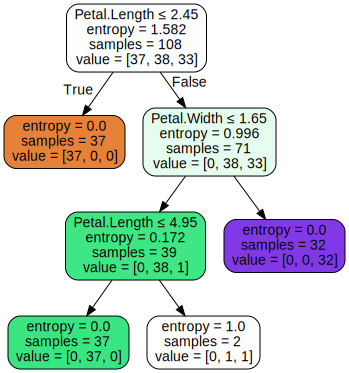

In [91]:
file = open("dtree_iris.dot")
text = file.read()
Source(text)
    dotfile.close()
file = open("dtree_iris.dot")
text = file.read()
Source(text)
Petal.Length ≤ 2.45
entropy = 1.582
samples = 108
value = [37, 38, 33]
entropy = 0.0
samples = 37
value = [37, 0, 0]
True
Petal.Width ≤ 1.65

## interpretación del árbol de desición:
* a la izquierda del nodo, siempre es verdadero
* a la derecha del nodo, falso
* analizar el valor de la entropía
* detalla la cantidad total de ejemplos
* entre corchetes, y separadas por coma, la cantidad de cada categoría (en este caso: setosa, versicolor, virgínica)
* es recursivo y puede tomar las mismas características que ya vió "más arriba": en el nodo raíz analiza el petal.lenght y    
  vuelve a utilizar este parámetro en la segunda rama
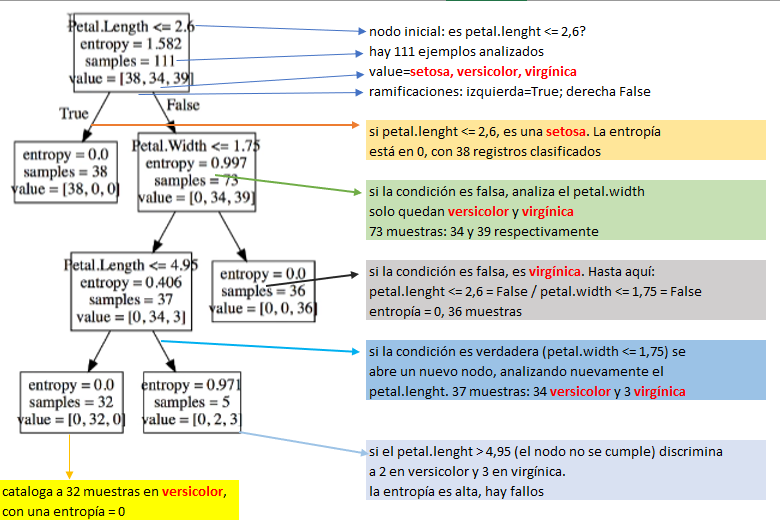

**analizar el fichero dot**
* digraph Tree {
* node [shape=box] ;
*    **<font color='red'>en nvalue se observa la cantidad de muestras x tipo de flor</font>**
* 0 [label="Petal.Width <= 0.8\nentropy = 1.57\nsamples = 109\nvalue = [29, 40, 40]"] ;
* **<font color='red'>aqui todas las muestras caen en el primer elemento y ahí se ve la entropia=0</font>**
* 1 [label="entropy = 0.0\nsamples = 29\nvalue = [29, 0, 0]"] ;
* **<font color='red'>observar la distancia y el ángulo</font>**
* 0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
* 2 [label="Petal.Width <= 1.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 40, 40]"] ;
* 0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
* 3 [label="Petal.Length <= 4.95\nentropy = 0.503\nsamples = 45\nvalue = [0, 40, 5]"] ;
* 2 -> 3 ;
* 4 [label="Petal.Width <= 1.65\nentropy = 0.172\nsamples = 39\nvalue = [0, 38, 1]"] ;
* 3 -> 4 ;
* 5 [label="entropy = 0.0\nsamples = 38\nvalue = [0, 38, 0]"] ;
* 4 -> 5 ;
* 6 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]"] ;
* 4 -> 6 ;
* 7 [label="entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]"] ;
* 3 -> 7 ;
* 8 [label="entropy = 0.0\nsamples = 35\nvalue = [0, 0, 35]"] ;
* 2 -> 8 ;
* }

## Cross_validation para la poda

In [92]:
x = data[predictors]
y = data[target]

In [93]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20, random_state=99)
tree.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [94]:
cv = KFold(n_splits=10, shuffle=True, random_state=99)

In [95]:
score = cross_val_score(tree, x, y, scoring="accuracy", cv=cv, n_jobs=1)

In [96]:
np.mean(score)

0.9466666666666667

## con un for voy cambiando el max_depth

* con feature_importances vemos la matriz de las categorías (variable objetivo) con su grado de importancia; el % de significancia de una sobre la otra

In [97]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(x, y)
    cv = KFold(n_splits=10, shuffle=True, random_state=99)
    cv.split(x)
    score = cross_val_score(tree, x, y, scoring="accuracy", cv=cv, n_jobs=1)
    print("max_deep = {}, score = {}".format(i, np.mean(score)))
    print("    feature de importancia ", tree.feature_importances_)
print("\nfeatures: ", predictors)

max_deep = 1, score = 0.5933333333333333
    feature de importancia  [0. 0. 1. 0.]
max_deep = 2, score = 0.9333333333333333
    feature de importancia  [0.         0.         0.66620285 0.33379715]
max_deep = 3, score = 0.9466666666666667
    feature de importancia  [0.         0.         0.68976981 0.31023019]
max_deep = 4, score = 0.9466666666666667
    feature de importancia  [0.         0.         0.66869158 0.33130842]
max_deep = 5, score = 0.9466666666666667
    feature de importancia  [0.         0.         0.66869158 0.33130842]
max_deep = 6, score = 0.9466666666666667
    feature de importancia  [0.         0.         0.66869158 0.33130842]
max_deep = 7, score = 0.9466666666666667
    feature de importancia  [0.         0.         0.66869158 0.33130842]
max_deep = 8, score = 0.9466666666666667
    feature de importancia  [0.         0.         0.66869158 0.33130842]
max_deep = 9, score = 0.9466666666666667
    feature de importancia  [0.         0.         0.66869158 0.3313084

**dado el for anterio, con 3 de max_depth obtengo el mejor score**

In [98]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=20, random_state=99)
tree.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=20,
                       random_state=99)

In [99]:
with open("dtree_iris_Final.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors, rounded=True, 
                    filled=True, special_characters=True)
    dotfile.close()

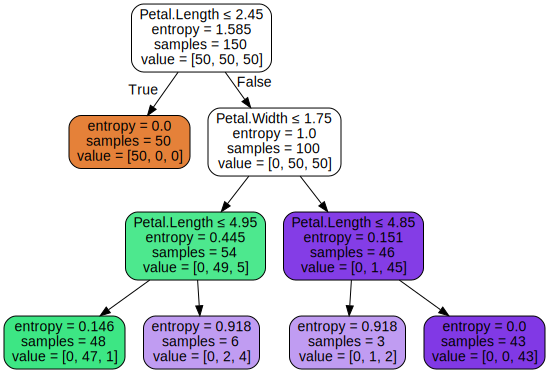

In [100]:
file = open("dtree_iris_Final.dot")
text = file.read()
Source(text)

### pruebo con class_weight = 'balanced', pero el modelo empeora

In [101]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i, min_samples_split=20, random_state=99, 
                                 class_weight='balanced')
    tree.fit(x, y)
    cv = KFold(n_splits=10, shuffle=True, random_state=99)
    cv.split(x)
    score = cross_val_score(tree, x, y, scoring="accuracy", cv=cv, n_jobs=1)
    print("max_deep = {}, score = {}".format(i, np.mean(score)))
    print("    feature de importancia ", tree.feature_importances_)
print("\nfeatures: ", predictors)

max_deep = 1, score = 0.6799999999999999
    feature de importancia  [0. 0. 1. 0.]
max_deep = 2, score = 0.9333333333333333
    feature de importancia  [0.         0.         0.66620285 0.33379715]
max_deep = 3, score = 0.9400000000000001
    feature de importancia  [0.         0.         0.68976981 0.31023019]
max_deep = 4, score = 0.9400000000000001
    feature de importancia  [0.         0.         0.66869158 0.33130842]
max_deep = 5, score = 0.9400000000000001
    feature de importancia  [0.         0.         0.66869158 0.33130842]
max_deep = 6, score = 0.9400000000000001
    feature de importancia  [0.         0.         0.66869158 0.33130842]
max_deep = 7, score = 0.9400000000000001
    feature de importancia  [0.         0.         0.66869158 0.33130842]
max_deep = 8, score = 0.9400000000000001
    feature de importancia  [0.         0.         0.66869158 0.33130842]
max_deep = 9, score = 0.9400000000000001
    feature de importancia  [0.         0.         0.66869158 0.3313084